In [1]:
from platform import python_version

print(python_version())

3.11.9


In [2]:
import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.0.3
Grader version: 0.22.9


In [3]:
# Save your API key to track your progress and have access to the quantum computers

your_api_key = "TjsUi7FnctBL0cYkFsJAMNHrGJkb4Pj7Dn4Ct71RTUX9"
your_crn = "crn:v1:bluemix:public:quantum-computing:us-east:a/0a47d07759a4490eb699bc3560c10e9b:7e0cbe99-6ea4-4ff0-889e-2db9b7a600e9::"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="qgss-2025",
    overwrite=True
)

In [4]:
# Check that the account has been saved properly
service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'TjsUi7FnctBL0cYkFsJAMNHrGJkb4Pj7Dn4Ct71RTUX9',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/0a47d07759a4490eb699bc3560c10e9b:7e0cbe99-6ea4-4ff0-889e-2db9b7a600e9::',
  'verify': True,
  'private_endpoint': False}}

In [5]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

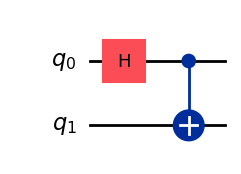

In [6]:
# Create a new circuit with a single qubit
qc = QuantumCircuit(2)
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubit 1
qc.cx(0, 1)
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

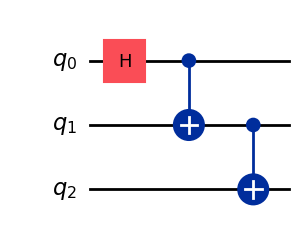

In [7]:
from qiskit import QuantumCircuit

# Create a new circuit with three qubits
qc = QuantumCircuit(3)

### WRITE YOUR CODE BELOW HERE ###
# Add a H gate to qubit 0
qc.h(0)

# Add a CNOT gate to qubits 0 and 1
qc.cx(0, 1)

# Add a CNOT gate to qubits 1 and 2
qc.cx(1, 2)

### YOUR CODE FINISHES HERE    ###

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

In [8]:
# Submit your answer using following code
grade_lab0_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


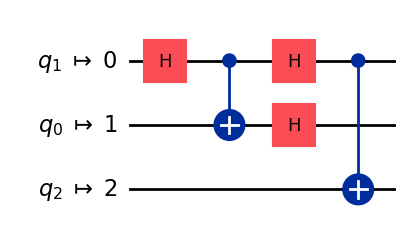

In [9]:
### WRITE YOUR CODE BELOW HERE ###
# Write the coupling map of connections between qubits 0 and 1 and 0 and 2 as a list of pairs: [[0,1],...]
coupling_map = [[0,1], [0,2]]

# Transpile the quantum circuit `qc` using the `transpile` function and the coupling map
from qiskit import transpile
qc_transpiled = transpile(qc, coupling_map=coupling_map)
### YOUR CODE FINISHES HERE    ###

qc_transpiled.draw("mpl")

In [10]:
# Submit your answer using following code
grade_lab0_ex2(qc_transpiled)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [11]:
# Add measurement operations
qc.measure_all()

# Set up the backend
backend = AerSimulator()

# Set up the sampler
sampler = Sampler(mode=backend)

# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# Get the results
results_sampler = job.result()

In [12]:
# Set up the Estimator
estimator = Estimator(mode=backend)

# Define some observables
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Submit the circuit to Estimator
pub = (qc, observables)
job = estimator.run(pubs=[pub])

# Get the results
results_estimator = job.result()

  Outcomes : {'000': 518, '111': 506}


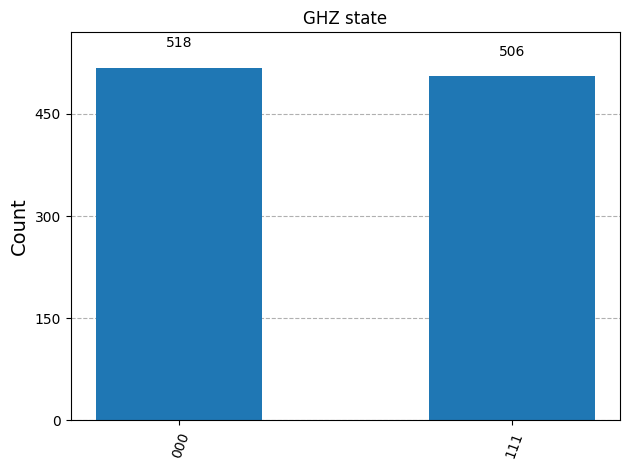

In [13]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Expectation values: [('ZZZ', np.float64(-0.0166015625)), ('ZZX', np.float64(-0.0068359375)), ('ZII', np.float64(0.00244140625)), ('XXI', np.float64(-0.04541015625)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


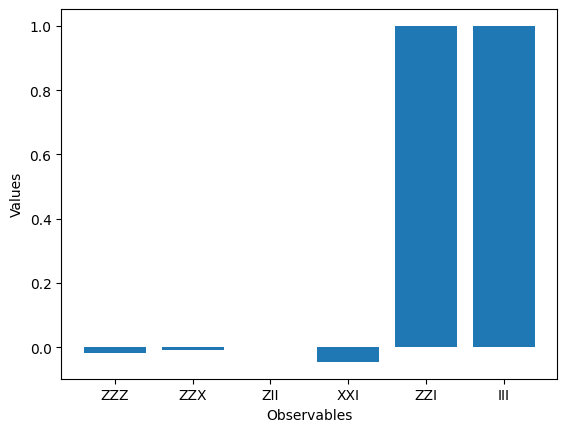

In [14]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# Set up our plot
container = plt.bar(observables_list, exp_values, width=0.8)
# Label each axis
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

In [15]:
# Define the service. This allows you to access IBM QPUs.
service = QiskitRuntimeService(name="qgss-2025")

# Get a backend
backend = service.least_busy(operational=True, simulator=False)
print(f"We are using the {backend.name} quantum computer")

We are using the ibm_sherbrooke quantum computer


In [16]:
### WRITE YOUR CODE BELOW HERE ###

# Step 1. Map
# You should have created a GHZ circuit above and assigned with variable 'qc'

# Step 2. Optimize
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
qc_transpiled = pm.run(qc)

# Optional: Compare original vs transpiled circuit
print("Original circuit:")
print(f"Depth: {qc.depth()}")
print(f"Gate count: {qc.count_ops()}")

print("\nTranspiled circuit:")
print(f"Depth: {qc_transpiled.depth()}")
print(f"Gate count: {qc_transpiled.count_ops()}")

Original circuit:
Depth: 4
Gate count: OrderedDict([('measure', 3), ('cx', 2), ('h', 1), ('barrier', 1)])

Transpiled circuit:
Depth: 8
Gate count: OrderedDict([('rz', 6), ('sx', 3), ('measure', 3), ('ecr', 2), ('x', 2), ('barrier', 1)])


In [17]:
# Step 3: Execute
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend)
job = sampler.run([qc_transpiled], shots=1000)

Outcomes: {'100': 6, '111': 501, '000': 472, '110': 11, '011': 4, '001': 5, '010': 1}


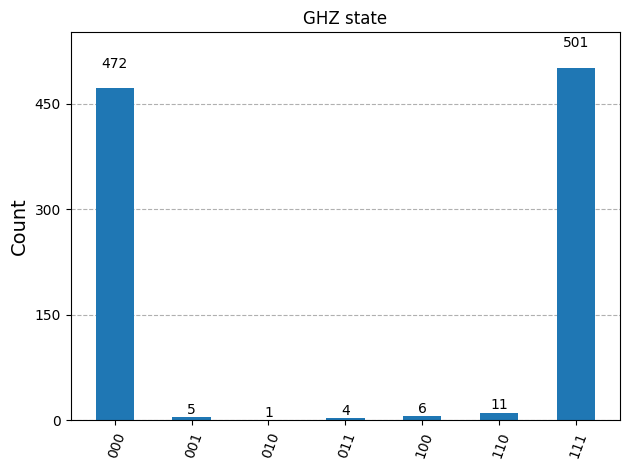

In [18]:
# Step 4: Post-process
results = job.result()
counts_list = results[0].data.meas.get_counts()

### YOUR CODE FINISHES HERE ###

print(f"Outcomes: {counts_list}")
plot_histogram(counts_list, title='GHZ state')